In [1]:
import numpy as np

from scripts.load_data import load_price_df, load_weather_df
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_treatment import compute_missing_values_by_col

In [4]:
from scripts.load_data import load_weather_weekly_df

price_df = load_price_df('../processed_data/prices-2016-2024.csv')
weather_df = load_weather_weekly_df('../processed_data/weather_2016_2023.csv')


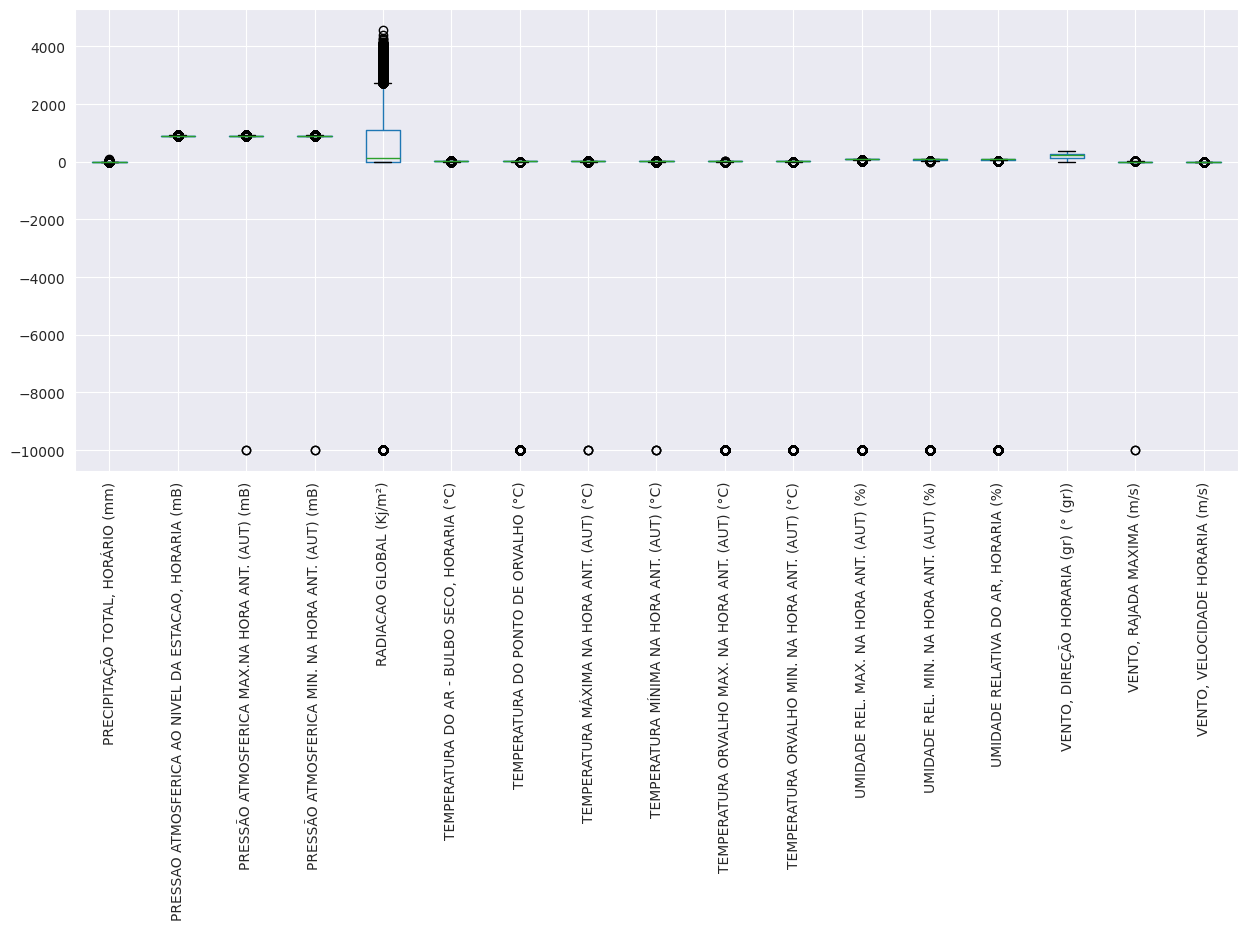

In [8]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
weather_df.boxplot(rot=90)
plt.show()

In [9]:

for col in weather_df.columns:
    weather_df[col] = weather_df[col].replace(-9999, np.nan)

#weather_df = weather_df.resample('W').mean()


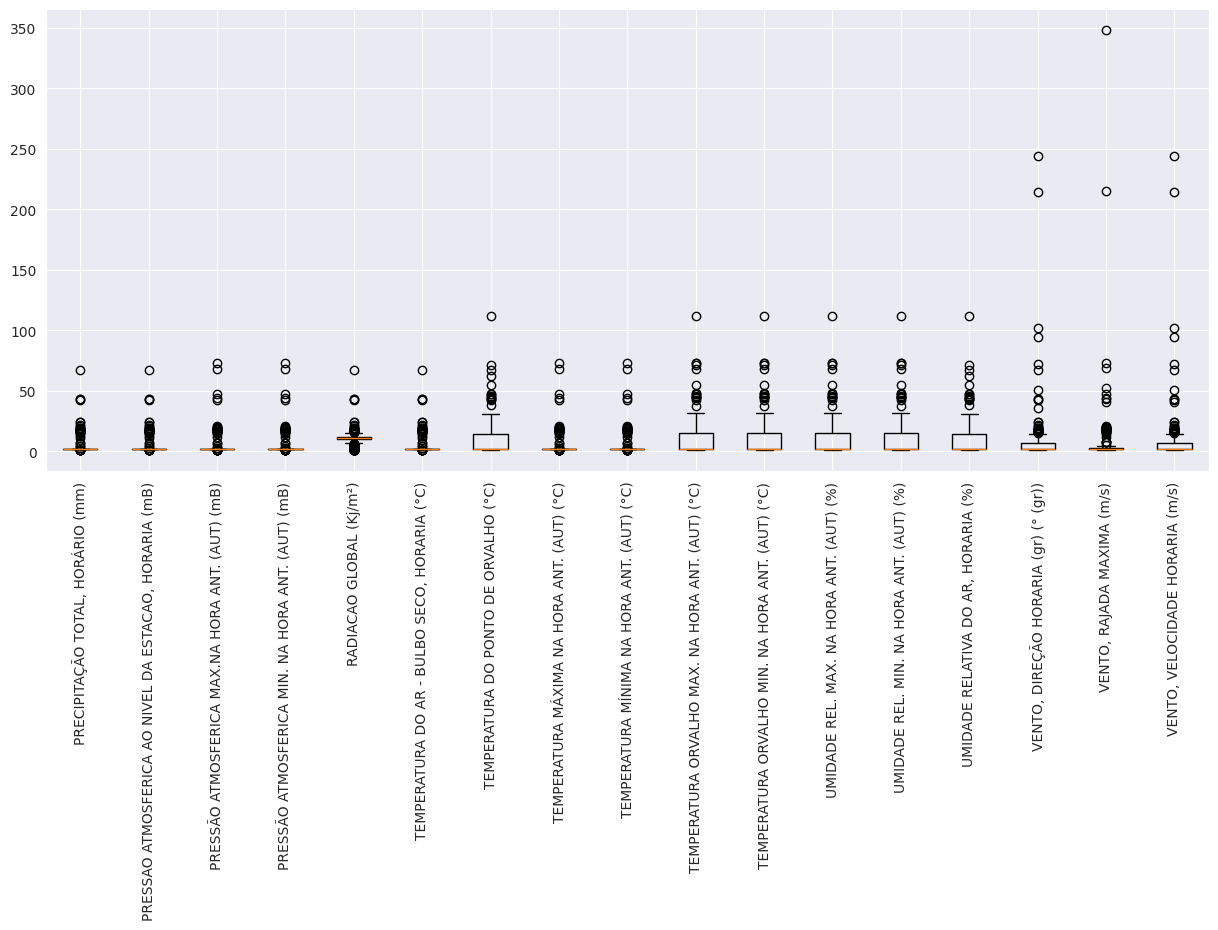

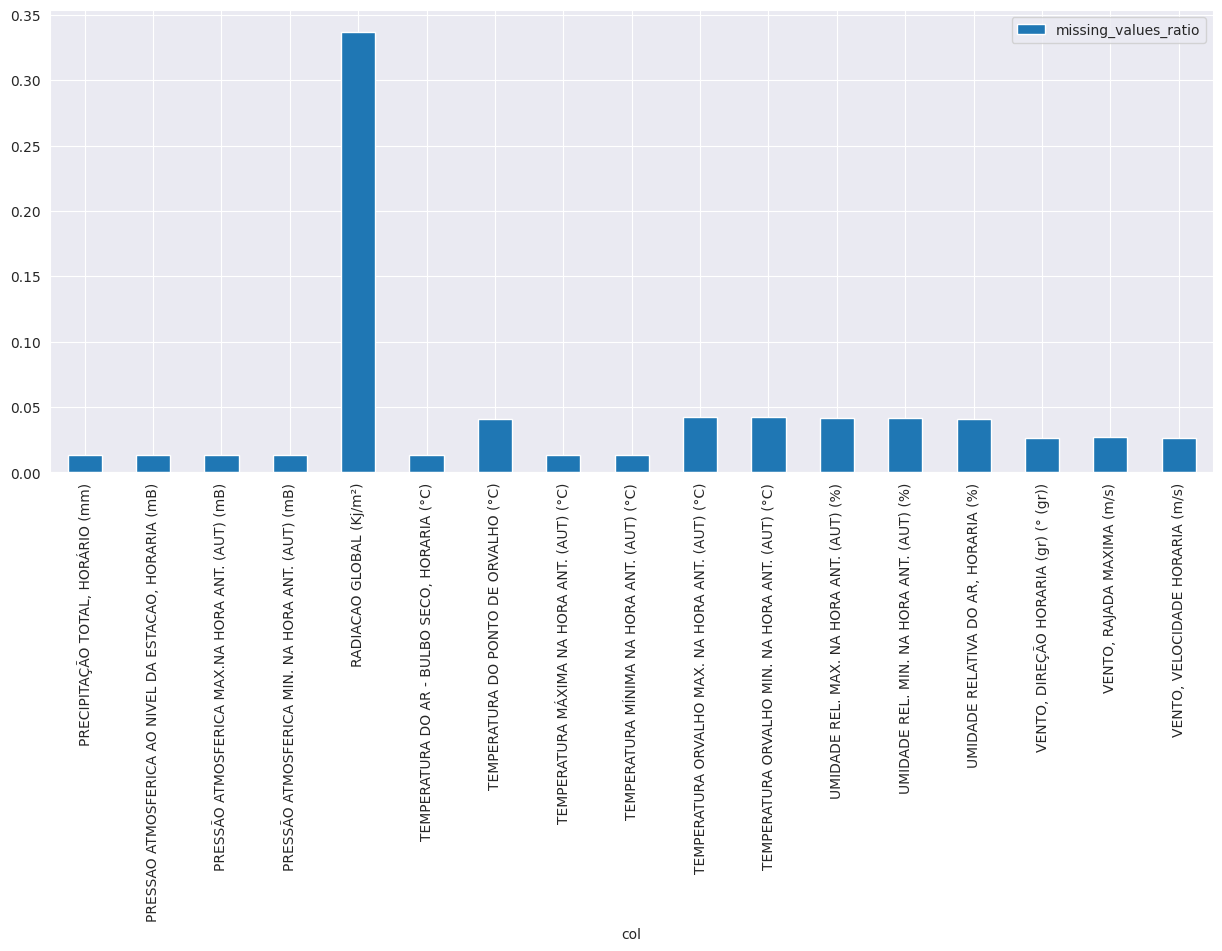

In [10]:
missing_values_by_col_df, missing_block_sizes =  compute_missing_values_by_col(weather_df)
plt.figure(figsize=(15, 6))
plt.boxplot(missing_block_sizes.values(), labels=missing_block_sizes.keys())
plt.xticks(rotation=90)
missing_values_by_col_df.plot(kind='bar', x='col', y='missing_values_ratio', figsize=(15, 6))
plt.show()

In [11]:
missing_block_sizes

{'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': [3,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  11,
  7,
  7,
  4,
  17,
  18,
  18,
  15,
  13,
  14,
  16,
  17,
  16,
  16,
  16,
  19,
  17,
  17,
  17,
  42,
  17,
  21,
  18,
  19,
  43,
  22,
  24,
  18,
  19,
  43,
  24,
  67,
  4,
  1,
  2],
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': [3,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  

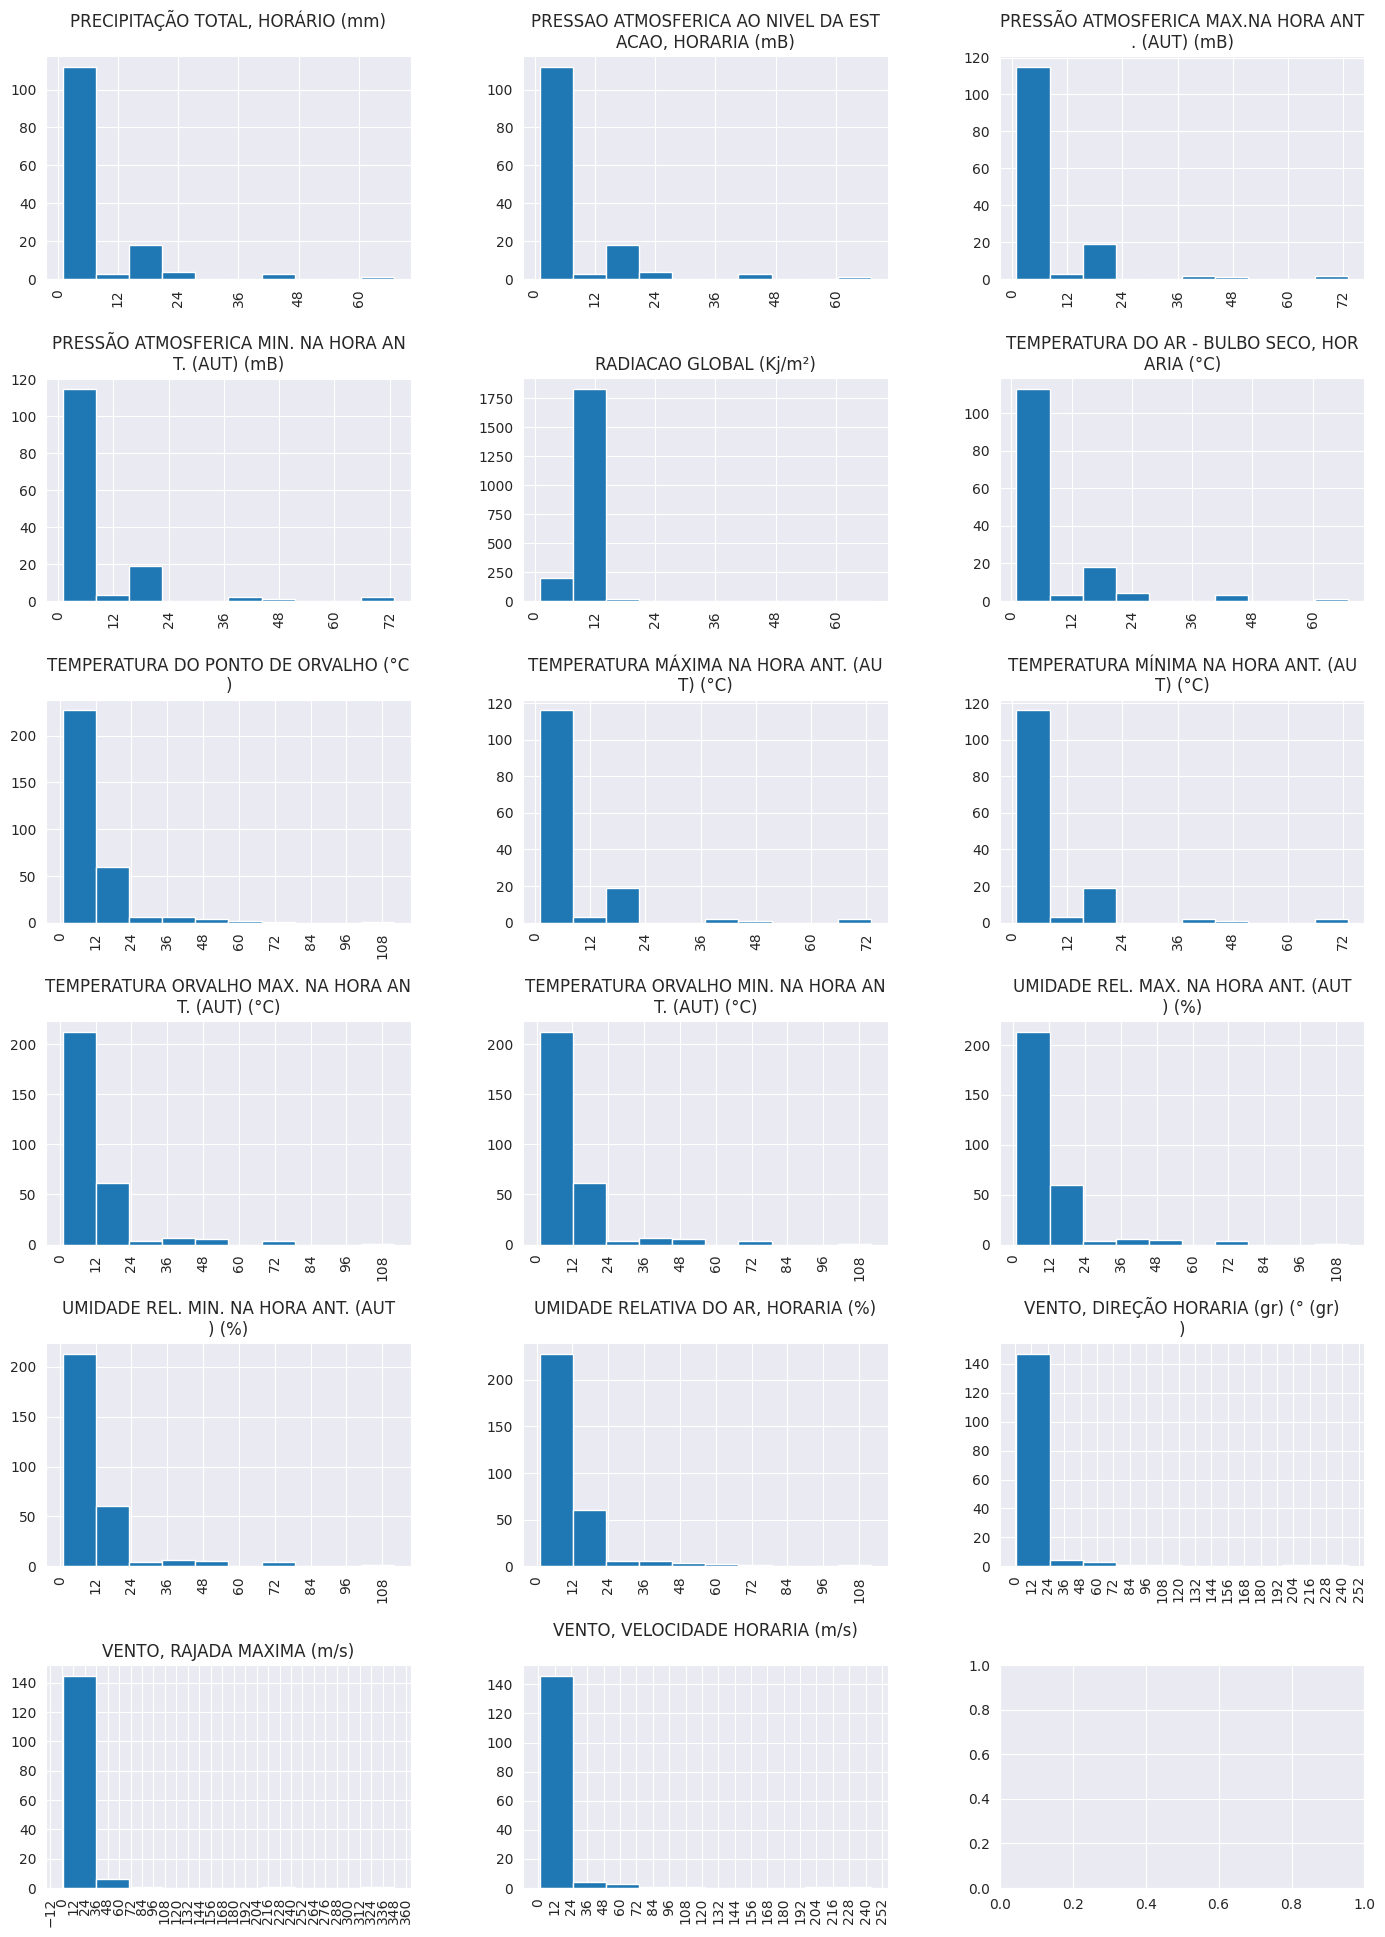

In [12]:
import matplotlib.ticker as ticker
cols = missing_values_by_col_df['col']

#plt.hist(missing_block_sizes[cols[0]])
fig, ax = plt.subplots(6,3, figsize=(15, 20))
fig.tight_layout(pad=5.0)
axes = ax.ravel()
for i, col in enumerate(cols):
    axes[i].hist(missing_block_sizes[col])
    axes[i].title.set_text(col if len(col) <= 30 else col[0:35] + "\n" + col[35:])
    axes[i].tick_params(axis="x", labelrotation=90)
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(12)) 
plt.show()